In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
import random
from tensorflow.keras import layers, models
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf

In [9]:
model1 = tf.keras.models.load_model('model/cnn/pneumonie_model1.h5')

/home/ken/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
def dataview(data):
    """
    Plots distibution of data
    :param data: list of labels
    :return: a plot 
    """
    count = []
    for value in data:
        if value == 0:
            count.append("PNEUMONIA")
        else:
            count.append("NORMAL")
    sns.countplot(count)
    plt.show()

In [12]:
model1.summary()
print(history1.history.keys())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       589,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 756,484 (2.89 MB)

 Trainable params: 756,482 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

NameError: name 'history1' is not defined

In [ ]:
dataview(ytrain)
dataview(yval)
dataview(ytest)

NameError: name 'ytrain' is not defined

In [ ]:
model1.summary()
print(history1.history.keys())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, None, None, 32)    320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, None, None, 32)    0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 64)    18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, None, None, 64)    0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, None, None, 128)   73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, None, None, 128)  

In [ ]:
print("Model evaluation:")
eval_model = model1.evaluate(x_test, y_test)
print(f"Model loss : {eval_model[0]}")
print(f"Model accuracy : {eval_model[1] * 100}%")

Model evaluation:
20/20 [==============================] - 7s 336ms/step - loss: 0.3132 - accuracy: 0.8942
Model loss : 0.3131605386734009
Model accuracy : 89.42307829856873%


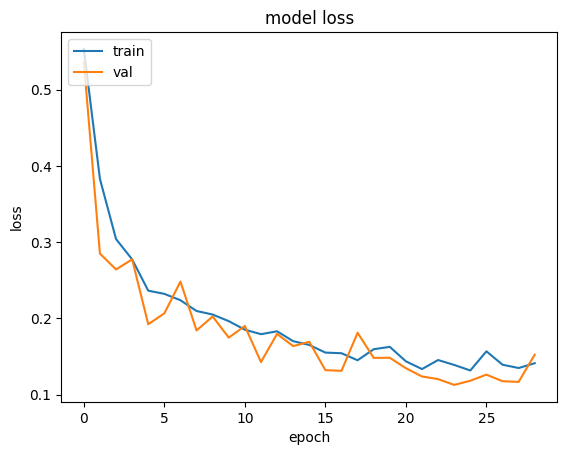

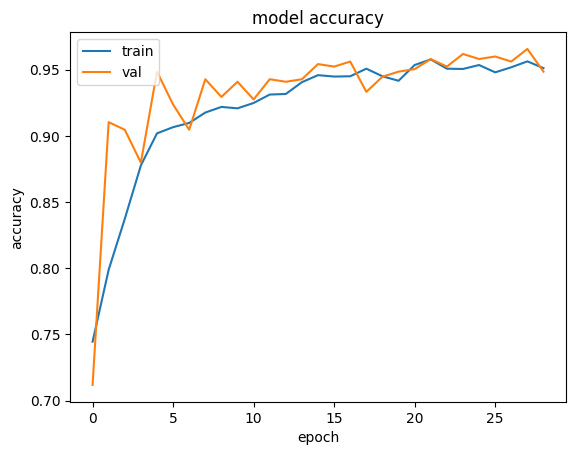

Program done


In [ ]:
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
print("Program done")